In [1]:
from __future__ import print_function

from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import RMSprop

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

%matplotlib inline

/home/admin-cip/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/admin-cip/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

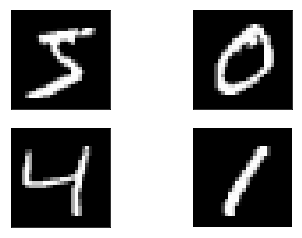

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
fig1 = plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
fig2 = plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
fig3 = plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
fig4 = plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.axis('off')
fig1.axes.get_xaxis().set_visible(False)
fig1.axes.get_yaxis().set_visible(False)
fig2.axes.get_xaxis().set_visible(False)
fig2.axes.get_yaxis().set_visible(False)
fig3.axes.get_xaxis().set_visible(False)
fig3.axes.get_yaxis().set_visible(False)
fig4.axes.get_xaxis().set_visible(False)
fig4.axes.get_yaxis().set_visible(False)
# show the plot
plt.show()

In [6]:
# Display the shape of the Training data
# Number of images, X-Axis and Y-Axis
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# Display the shape of the Training data
# Number of images and combined X and Y Axis.
x_train.shape

(60000, 784)

In [42]:
# Ground truth. Each image shows a certain number
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
# Save test ground truth for the confusion matrix
y_true=y_test

In [10]:
# convert class vectors to binary class matrices
# "One-Hot-Encoding"
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# One-hot-encoded vector
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================]60000/60000 [==============================] - 4s 69us/step - loss: 0.2525 - acc: 0.9275 - val_loss: 0.1377 - val_acc: 0.9588

Epoch 2/20
60000/60000 [==============================]60000/60000 [==============================] - 3s 49us/step - loss: 0.1042 - acc: 0.9695 - val_loss: 0.0920 - val_acc: 0.9702

Epoch 3/20
60000/60000 [==============================]60000/60000 [==============================] - 3s 48us/step - loss: 0.0680 - acc: 0.9794 - val_loss: 0.0796 - val_acc: 0.9766

Epoch 4/20
60000/60000 [==============================]60000/60000 [==============================] - 3s 51us/step - loss: 0.0498 - acc: 0.9844 - val_loss: 0.0771 - val_acc: 0.9768

Epoch 5/20
60000/60000 [==============================]60000/60000 [==============================] - 3s 51us/step - loss: 0.0379 - acc: 0.9888 - val_loss: 0.0735 - val_acc: 0.9792

Epoch 6/20
60000/60000 [================

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (10000, 28, 28)

In [17]:
# Predict the non trained examples
y_pred = model.predict_classes(x_test)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

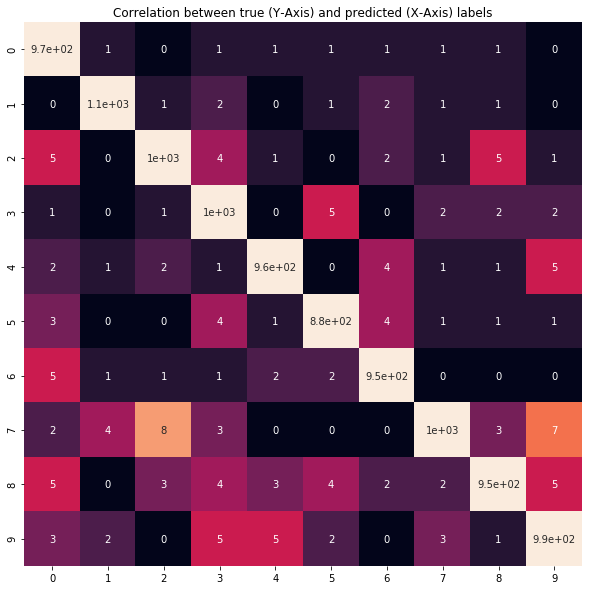

In [35]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,10))
plt.title('Correlation between true (Y-Axis) and predicted (X-Axis) labels')
sn.heatmap(df_cm, annot=True, vmin=0, vmax=10, cbar=False)

In [20]:
# Assign correct and incorrect examples
correct_indices = np.nonzero(y_pred == y_true)[0]
incorrect_indices = np.nonzero(y_pred != y_true)[0]

In [21]:
# Reshape flat image to 2D image again
x_test = x_test.reshape(10000, 28,28)

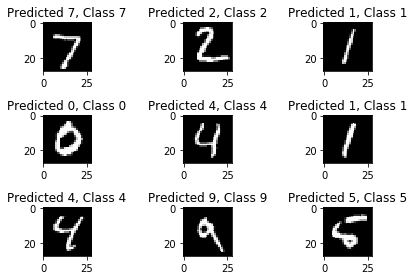

In [22]:
#plotting graph of correct predicted test data
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_true[correct]))
plt.tight_layout()
plt.show()

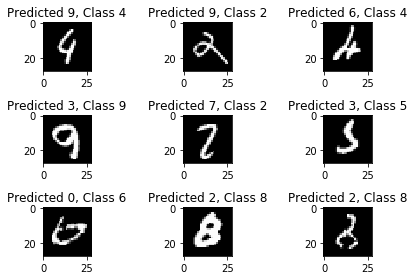

In [37]:
#plotting graph of incorrect predicted test data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_true[incorrect]))
plt.tight_layout()
plt.show()